In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

from parity import parity_plot

In [2]:
truth_df = pd.read_csv(Path("../data/vermeire/solprop_nonaq.csv"))
pred_df = pd.read_csv(Path("../solprop_nonaq_vermeire_predictions.csv"))

Assert that the two files are in the same order

In [3]:
for (_, truth_row), (_, pred_row) in zip(truth_df.iterrows(), pred_df.iterrows()):
    assert truth_row["solute_smiles"] == pred_row["Solute"]
    assert truth_row["solvent_smiles"] == pred_row["Solvent"]
    assert truth_row["temperature"] == pred_row["Temp"]

Extract a subset of the data for individual plotting

In [4]:
truth_subset_df = truth_df.iloc[2702:2708]
pred_subset_df = pred_df.iloc[2702:2708]

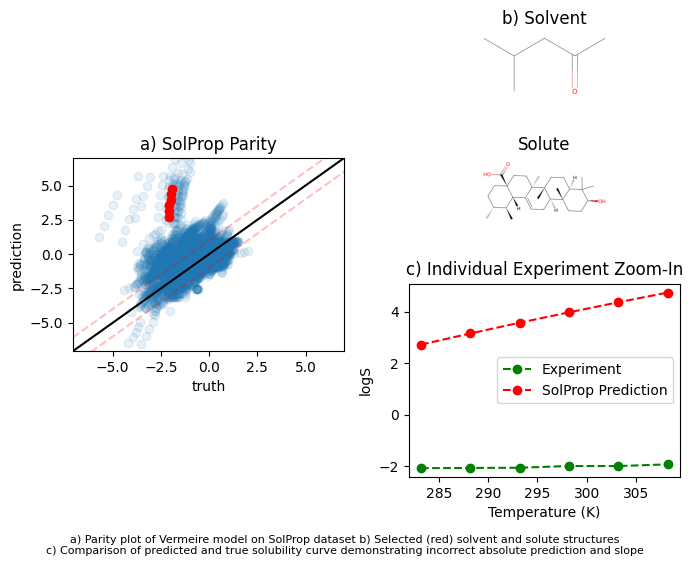

In [5]:
fig, axes_dict = plt.subplot_mosaic(
    """
..DD
AABB
AACC
..CC
""",
    figsize=(7, 6),
)
plt.sca(axes_dict["A"])
parity_plot(truth=truth_df["logS"], prediction=pred_df["logST (method1) [log10(mol/L)]"], title="SolProp Parity")
plt.scatter(x=truth_subset_df["logS"], y=pred_subset_df["logST (method1) [log10(mol/L)]"], color="r")
axes_dict["A"].set_title("a) SolProp Parity")
axes_dict["A"].set_ylim(axes_dict["A"].get_ylim()[0], 7)
axes_dict["A"].set_xlim(axes_dict["A"].get_xlim()[0], 7)
axes_dict["B"].imshow(Draw.MolToImage(Chem.MolFromSmiles(truth_subset_df["solute_smiles"].iloc[0]), size=(800, 400)))
axes_dict["B"].set_axis_off()
axes_dict["B"].set_title("Solute")
axes_dict["D"].imshow(Draw.MolToImage(Chem.MolFromSmiles(truth_subset_df["solvent_smiles"].iloc[0]), size=(800, 400)))
axes_dict["D"].set_axis_off()
axes_dict["D"].set_title("b) Solvent")
axes_dict["C"].plot(
    truth_subset_df["temperature"],
    truth_subset_df["logS"],
    "go--",
    label="Experiment",
)
axes_dict["C"].plot(
    truth_subset_df["temperature"],
    pred_subset_df["logST (method1) [log10(mol/L)]"],
    "ro--",
    label="SolProp Prediction",
)
axes_dict["C"].set_xlabel("Temperature (K)")
axes_dict["C"].set_ylabel("logS")
axes_dict["C"].set_title("c) Individual Experiment Zoom-In")
axes_dict["C"].legend(loc="right")
fig.suptitle(
    """
a) Parity plot of Vermeire model on SolProp dataset b) Selected (red) solvent and solute structures
c) Comparison of predicted and true solubility curve demonstrating incorrect absolute prediction and slope
""",
    size=8,
    y=0.02,
)
plt.tight_layout()
plt.show()